# Cost function & Gradiant Desent algorithem
find values for
coefficient , learning rate,. stop algoritem
when relative cost in
two sequence iteration be 1e-20,
then return coefficient and intercept
hint: use math.isclose(cost, cost_previous, rel_tol=1e-20) 

### Import libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# df=pd.read_clipboard().to_csv()
df=pd.read_csv('./scores.xlsx')



In [12]:
df.math.values

array([92, 56, 88, 70, 80, 49, 65, 35, 66, 67])

### Train

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.math.values, df.cs.values, test_size=0.25, random_state=10000)
print ('Train set:\n', X_train,  y_train)
print ('Test set: \n', X_test,  y_test)


Train set:
 [56 92 67 88 35 66 49] [68 98 73 81 30 68 52]
Test set: 
 [80 65 70] [83 66 80]


### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)
# reg.intercept_
print ('coefficient:', reg.coef_)
print ('intercept_:',reg.intercept_)
# reg.coef_[0]
# reg.intercept_
y_hat=reg.predict(X_test.reshape(-1, 1) )
print (f'y:{y_test} , y_hat: {y_hat}')



coefficient: [1.00554412]
intercept_: 2.069787379972553
y:[83 66 80] , y_hat: [82.51331733 67.43015546 72.45787609]


In [30]:
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
# print(mean_squared_error(y_test, y_hat))
print((y_test-y_hat))
print((y_test-y_hat)**2)
np.sum((y_test-y_hat)**2) /(len(y_test)*2)
# from sklearn.metrics import r2_score
# print("R2-score: %.2f" % r2_score(y_test , y_hat) )

[ 0.48668267 -1.43015546  7.54212391]
[ 0.23686002  2.04534465 56.88363313]


9.860972967967163

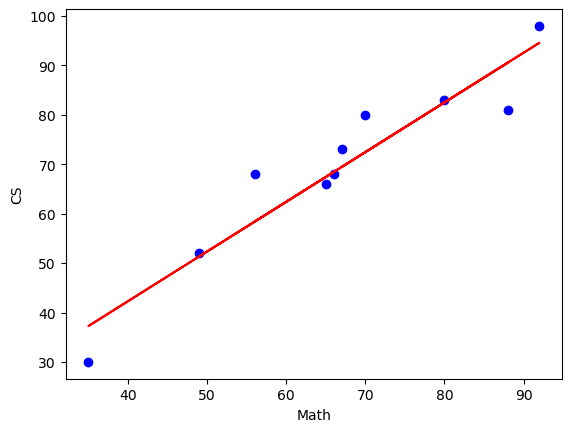

In [31]:
plt.scatter(df.math, df.cs,  color='blue')
plt.plot(X_train, reg.coef_[0]*X_train + reg.intercept_, '-r')

plt.xlabel("Math")
plt.ylabel("CS")
plt.show()

In [32]:
# y_hat = reg.intercept_ + reg.coef_*teta

In [33]:
# pick some random value to start with
theta_0 = 1.00554412
theta_1 = 2.069787379972553
def hypothesis (theta_0,theta_1,X):
    return theta_1*X + theta_0

def cost_function (X,y,theta_0,theta_1):
    m = len(X)
    summation = 0.0
    for i in range (m):
        summation += ((theta_1 * X[i] + theta_0) - y[i])**2
    return summation /(2*m)

def gradient_descent(X,y,theta_0,theta_1,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    m = len(X)
    
    for i in range (m):
        t0_deriv += (theta_1 * X[i] + theta_0) - y[i]
        t1_deriv += ((theta_1 * X[i] + theta_0) - y[i])* X[i]
    theta_0 -= (1/m) * learning_rate * t0_deriv
    theta_1 -= (1/m) * learning_rate * t1_deriv
    return theta_0,theta_1

import math

def training (X, y, theta_0, theta_1, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    cc=0
    
    for i in range(iters):
        theta_0,theta_1 = gradient_descent(X, y, theta_0, theta_1, learning_rate)
        t0_history.append(theta_0)
        t1_history.append(theta_1)
        cost = cost_function(X, y, theta_0, theta_1)
        cost_history.append(cost)
#         if i%10 == 0:
        print ("iter={}, theta_0={}, theta_1={}, cost= {}".format(i, theta_0, theta_1, cost))
        
        if(math.isclose(cost, cost_history[-1], rel_tol=1e-20)):
            cc+=1
            if cc==4:
                print('hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii')
                
    return t0_history, t1_history, cost_history

In [34]:
# training(df.math,df.cs,theta_0, theta_1,np.random(),.01)
t0_history, t1_history, cost_history = training (X_test,y_test, theta_0, theta_1,.1, 1000);

# import math


iter=0, theta_0=-6.295153181803295, theta_1=-525.2515812824901, cost= 716997912.1985985
iter=1, theta_0=3766.2706946608887, theta_1=271888.5569968757, cost= 191348660756084.4
iter=2, theta_0=-1945137.3815190808, theta_1=-140456880.29553136, cost= 5.106613245521665e+19
iter=3, theta_0=1004857026.107941, theta_1=72559919374.87617, cost= 1.3628263054623513e+25
hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
iter=4, theta_0=-519108384188.8154, theta_1=-37484399831926.31, cost= 3.637039755240814e+30
iter=5, theta_0=268171001249709.62, theta_1=1.936441278994384e+16, cost= 9.706341980766521e+35
iter=6, theta_0=-1.3853693776013944e+17, theta_1=-1.0003641098181616e+19, cost= 2.5903779168713693e+41
iter=7, theta_0=7.156807795965079e+19, theta_1=5.167873475264752e+21, cost= 6.913065463293059e+46
iter=8, theta_0=-3.6972015302567036e+22, theta_1=-2.6697195545329555e+24, cost= 1.8449228503884136e+52
iter=9, theta_0=1.9099715327047206e+25, theta_1=1.3791751160259403e+27, cost= 4.923633866854673e+57
iter=10, theta_0

/tmp/ipykernel_147251/1989263970.py:11: RuntimeWarning: overflow encountered in double_scalars
  summation += ((theta_1 * X[i] + theta_0) - y[i])**2
/tmp/ipykernel_147251/1989263970.py:20: RuntimeWarning: overflow encountered in double_scalars
  t0_deriv += (theta_1 * X[i] + theta_0) - y[i]
/tmp/ipykernel_147251/1989263970.py:21: RuntimeWarning: overflow encountered in double_scalars
  t1_deriv += ((theta_1 * X[i] + theta_0) - y[i])* X[i]
/tmp/ipykernel_147251/1989263970.py:22: RuntimeWarning: invalid value encountered in double_scalars
  theta_0 -= (1/m) * learning_rate * t0_deriv
/tmp/ipykernel_147251/1989263970.py:23: RuntimeWarning: invalid value encountered in double_scalars
  theta_1 -= (1/m) * learning_rate * t1_deriv


In [35]:
# import numpy as np
# import matplotlib.pyplot as plt
 
# def mean_squared_error(y_true, y_predicted):
     
#     # Calculating the loss or cost
#     cost = np.sum((y_true-y_predicted)**2) / 2*len(y_true)
#     return cost
 
# # Gradient Descent Function
# # Here iterations, learning_rate, stopping_threshold
# # are hyperparameters that can be tuned
# def gradient_descent(x, y, iterations = 1000, learning_rate = 0.001):
# #                      stopping_threshold = 1e-20):
     
#     # Initializing weight, bias, learning rate and iterations
#     current_weight = 0.1
#     current_bias = 0.01
#     iterations = iterations
#     learning_rate = learning_rate
#     n = float(len(x))
     
#     costs = []
#     weights = []
#     previous_cost = None
     
#     # Estimation of optimal parameters
#     for i in range(iterations):
         
#         # Making predictions
#         y_predicted = (current_weight * x) + current_bias
         
#         # Calculationg the current cost
#         current_cost = mean_squared_error(y, y_predicted)
 
#         # If the change in cost is less than or equal to
#         # stopping_threshold we stop the gradient descent
# #         if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
#         if previous_cost and math.isclose(current_cost, previous_cost, rel_tol=1e-20):
#             print("*************************************************************")
#             break
         
#         previous_cost = current_cost
 
#         costs.append(current_cost)
#         weights.append(current_weight)
         
#         # Calculating the gradients
#         weight_derivative = -(2/n) * sum(x * (y-y_predicted))
#         bias_derivative = -(2/n) * sum(y-y_predicted)
         
#         # Updating weights and bias
#         current_weight = current_weight - (learning_rate * weight_derivative)
#         current_bias = current_bias - (learning_rate * bias_derivative)
                 
#         # Printing the parameters for each 1000th iteration
#         print(f"Iteration {i+1}: Cost {current_cost}, Weight \
#         {current_weight}, Bias {current_bias}")
     
     
#     # Visualizing the weights and cost at for all iterations
#     plt.figure(figsize = (8,6))
#     plt.plot(weights, costs)
#     plt.scatter(weights, costs, marker='o', color='red')
#     plt.title("Cost vs Weights")
#     plt.ylabel("Cost")
#     plt.xlabel("Weight")
#     plt.show()
     
#     return current_weight, current_bias
 
 
# def main():
     
#     # Data
#     X = df.math.values
#     Y = df.cs.values
#     # Estimating weight and bias using gradient descent
#     estimated_weight, eatimated_bias = gradient_descent(df.math, df.cs, iterations=20000)
#     print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")
 
#     # Making predictions using estimated parameters
#     Y_pred = estimated_weight*X + eatimated_bias
 
#     # Plotting the regression line
#     plt.figure(figsize = (8,6))
#     plt.scatter(X, Y, marker='o', color='red')
#     plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
#              markersize=10,linestyle='dashed')
#     plt.xlabel("X")
#     plt.ylabel("Y")
#     plt.show()
    
# main()

# 3

In [36]:
# import numpy as np
# import matplotlib.pyplot as plt
 
# class Linear_Regression:
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y
#         self.a = [0, 0]
     
#     def update_coeffs(self, learningrate):
#         y_pred = self.predict()
#         y = self.y
#         b = len(y)
#         self.a[0] = self.a[0] - (learningrate * ((1/b) *
#                                 np.sum(y_pred - y)))
 
#         self.a[1] = self.a[1] - (learningrate * ((1/b) *
#                                 np.sum((y_pred - y) * self.X)))
 
#     def predict(self, X=[]):
#         y_pred = np.array([])
#         if not X: X = self.X
#         a = self.a
#         for x in X:
#             y_pred = np.append(y_pred, a[0] + (a[1] * x))
 
#         return y_pred
     
#     def get_current_accuracy(self, y_pred):
#         t, e = y_pred, self.y
#         s = len(y_pred)
#         return 1-sum(
#             [
#                 abs(t[i]-e[i])/e[i]
#                 for i in range(s)
#                 if e[i] != 0]
#         )/s

 
#     def compute_cost(self, y_pred):
#         b = len(self.y)
#         J = (1 / 2*b) * (np.sum(y_pred - self.y)**2)
#         return J
 
#     def plot_best_fit(self, y_pred, fig):
#                 f = plt.figure(fig)
#                 plt.scatter(self.X, self.y, color='r')
#                 plt.plot(self.X, y_pred, color='y')
#                 f.show()
 
 
# def main():
#     X = np.array([i for i in range(11)])
#     y = np.array([2*i for i in range(11)])
#     regr = Linear_Regression(y_test, y_hat)
# #     regr = Linear_Regression(X, y)
 
#     iterations = 0
#     steps = 10
#     learningrate = 3
#     costs = []
   
#     y_pred = regr.predict()
#     regr.plot_best_fit(y_pred, 'Initial best fit line')
     
 
#     while 1:
#         y_pred = regr.predict()
#         cst = regr.compute_cost(y_pred)
#         costs.append(cst)
#         regr.update_coeffs(learningrate)
         
#         iterations += 1
#         if iterations % steps == 0:
#             print(iterations, "epochs elapsed")
#             print("current accuracy is :",
#                 regr.get_current_accuracy(y_pred),
#                 f'cost {cst}'
#                  )
#             break
 
#     #final best-fit line
#     regr.plot_best_fit(y_pred, 'Final Best Fit Line')
 
#     h = plt.figure('Verification')
#     plt.plot(range(iterations), costs, color='r')
#     h.show()
 
#     regr.predict([i for i in range(10)])
 
# if __name__ == '__main__':
#     main()

In [37]:
# import numpy as np
# import matplotlib.pyplot as plt
# Define Regressor class
class Regressor():
    # init methodd initializes all parameters needed to implement regression
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    # random initialization of weights and bias
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    # compute the error function: sum of squared errors 
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    # implement optimization function
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    # normalize the dataset by subtracting the mean and dividing by std deviation
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)
    # fit the model to the dataset: training process
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    # test the model on test data
    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    # plot the iterations vs cost curves
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    # calculates the accuracy
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
    


In [48]:
# from sklearn.datasets import load_boston
# from sklearn.model_selection import train_test_split

data = load_boston()
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(data.data, data.target,test_size=0.1)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
# normalize the dataset and instantiate Regressor object
regressor = Regressor(normalize=True)
# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)


print("Train Score:", train_score)
print("Test Score: ",test_score)
# regressor.plot()
print(type(X_train))

X_train:(455, 13)
y_train:(455,)
Train Score: 0.746148817304484
Test Score:  0.3499558553993003
<class 'numpy.ndarray'>
